In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from algorithms.generalised_delta import TwoLP
from data.binary_data import generate_data_ex3, split_50, split_25, split_A
from algorithms.metrics import precision, recall

# 1. Effect of the hidden layer on the performance

In [99]:
data = generate_data_ex3()
X, y = data[:, :2], data[:, 2]
tlp = TwoLP(nodes_num=2, output_dim=1, features_num=3, lr=0.01)
tlp.train(X, y, epochs=400, verbose=True)
X_bias = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X_bias.T)

Precision for A: 0.6583333333333333, for B: 0.7375
Recall for A: 0.79, for B: 0.59


(0.79, 0.59)

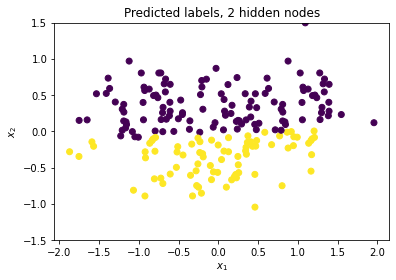

In [100]:
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 2 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1
precision(y, y_pred)
recall(y, y_pred)

In [101]:
data = generate_data_ex3()
X, y = data[:, :2], data[:, 2]
tlp1 = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp1.train(X, y, epochs=400, verbose=True)
X = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp1.forward_pass(X.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1

Precision for A: 0.9375, for B: 0.9038461538461539
Recall for A: 0.9, for B: 0.94


(0.9, 0.94)

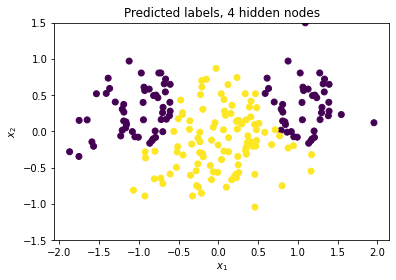

In [102]:
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 4 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

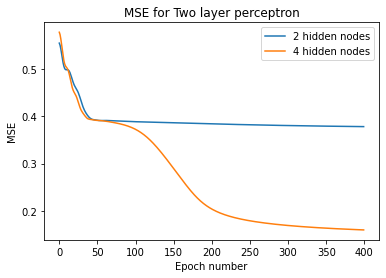

In [103]:
plt.plot(tlp.MSE, label='2 hidden nodes')
plt.plot(tlp1.MSE, label='4 hidden nodes')
plt.title('MSE for Two layer perceptron')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

In [104]:
precisions = []
recalls = []
data = generate_data_ex3()
hidden_node_nums = [1,2,3,4,5,6]
X, y = data[:, :2], data[:, 2]
for hidden_nodes in hidden_node_nums:
    tlp = TwoLP(nodes_num=hidden_nodes, output_dim=1, features_num=3, lr=0.01)
    tlp.train(X, y, epochs=400, verbose=True)
    X_bias = np.c_[X, np.ones(X.shape[0])]
    _, y_pred = tlp.forward_pass(X_bias.T)
    y_pred[y_pred <= 0] = -1
    y_pred[y_pred > 0] = 1
    precisions.append(precision(y, y_pred))
    recalls.append(recall(y, y_pred))   

Precision for A: 0.6614173228346457, for B: 0.7808219178082192
Recall for A: 0.84, for B: 0.57
Precision for A: 0.6583333333333333, for B: 0.7375
Recall for A: 0.79, for B: 0.59
Precision for A: 0.6551724137931034, for B: 0.7142857142857143
Recall for A: 0.76, for B: 0.6
Precision for A: 0.9375, for B: 0.9038461538461539
Recall for A: 0.9, for B: 0.94
Precision for A: 0.9278350515463918, for B: 0.9029126213592233
Recall for A: 0.9, for B: 0.93
Precision for A: 0.9278350515463918, for B: 0.9029126213592233
Recall for A: 0.9, for B: 0.93


Text(0, 0.5, 'Recall')

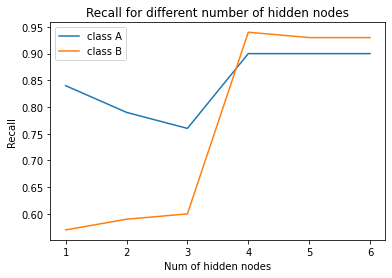

In [105]:
plt.plot(hidden_node_nums, recalls)
plt.legend(labels=('class A', 'class B'))
plt.title("Recall for different number of hidden nodes")
plt.xlabel('Num of hidden nodes')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

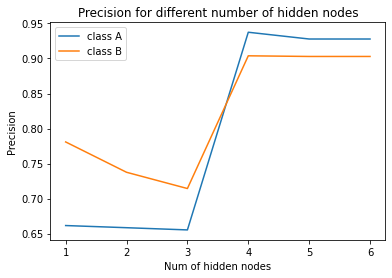

In [106]:
plt.plot(hidden_node_nums, precisions)
plt.legend(labels=('class A', 'class B'))
plt.title("Precision for different number of hidden nodes")
plt.xlabel('Num of hidden nodes')
plt.ylabel('Precision')

# Part 2

How do the learning/error curves for the training and the validation
sets compare? Are they similar? In what cases do you observe more
dissimilarity?

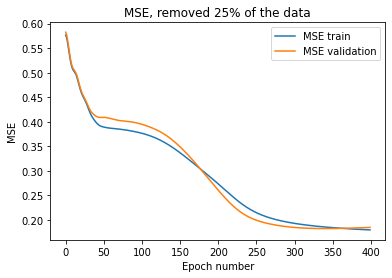

In [113]:
X_train, X_test, y_train, y_test = split_25(data)
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 25% of the data')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

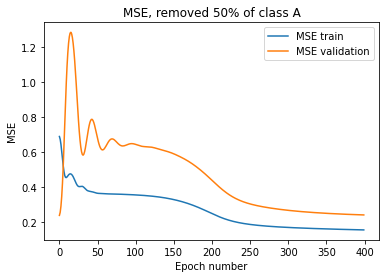

In [151]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 50% of class A')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

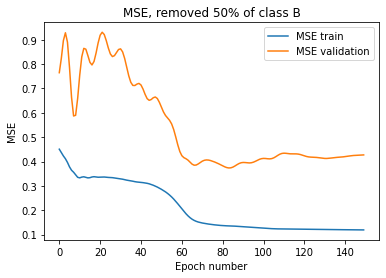

In [150]:
X_train, X_test, y_train, y_test = split_50(data, class_label=1)
tlp = TwoLP(nodes_num=5, output_dim=1, features_num=3, lr=0.1)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=150, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 50% of class B')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

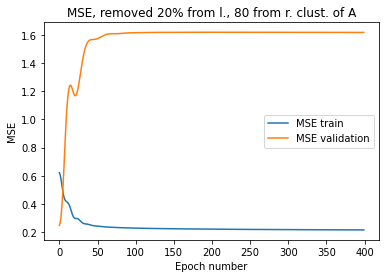

In [152]:
X_train, X_test, y_train, y_test = split_A(data)
tlp = TwoLP(nodes_num=5, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=400, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 20% from l., 80 from r. clust. of A')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

Precision for A: 0.9230769230769231, for B: 0.6486486486486487
Recall for A: 0.48, for B: 0.96


(0.48, 0.96)

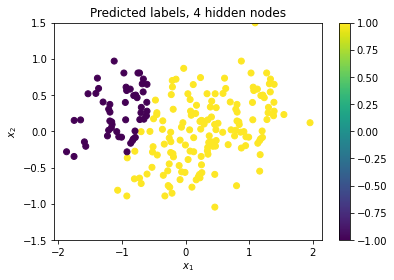

In [153]:
X_bias = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X_bias.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 4 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()

precision(y, y_pred)
recall(y, y_pred)

### Dot 2
How do these curves and the network performance depend on the size
of the hidden layer in various training/validation data configurations
(the aforementioned subsampling options)?

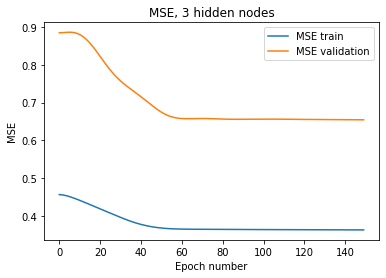

In [212]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=3, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=150, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, 3 hidden nodes')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

Precision for A: 0.7321428571428571, for B: 0.5902777777777778
Recall for A: 0.41, for B: 0.85


(0.41, 0.85)

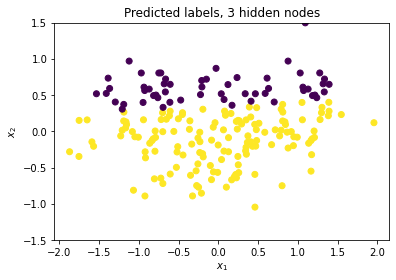

In [199]:
X_bias = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X_bias.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 3 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

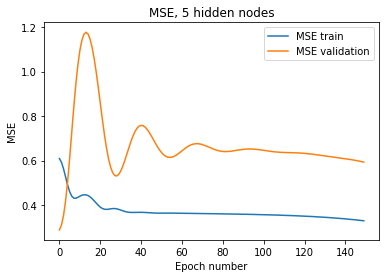

In [214]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=5, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=150, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, 5 hidden nodes')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

Precision for A: 0.78125, for B: 0.6323529411764706
Recall for A: 0.5, for B: 0.86


(0.5, 0.86)

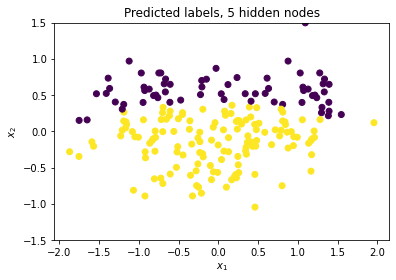

In [215]:
X_bias = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X_bias.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 5 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

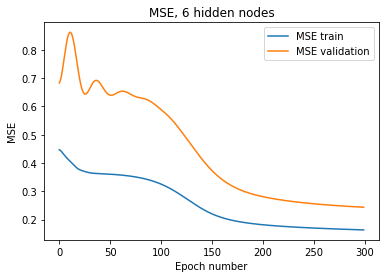

In [219]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=6, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=300, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, 6 hidden nodes')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

Precision for A: 0.9545454545454546, for B: 0.8571428571428571
Recall for A: 0.84, for B: 0.96


(0.84, 0.96)

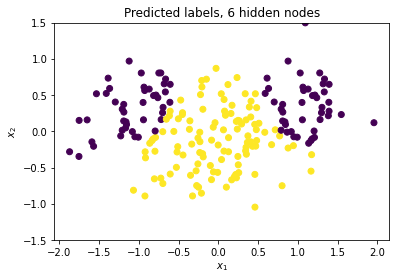

In [218]:
X_bias = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X_bias.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels, 6 hidden nodes')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

precision(y, y_pred)
recall(y, y_pred)

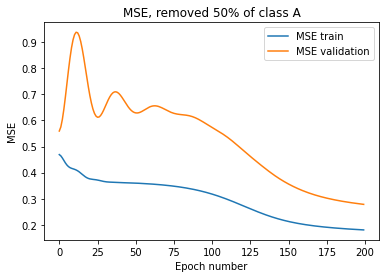

In [209]:
X_train, X_test, y_train, y_test = split_50(data, class_label=-1)
tlp = TwoLP(nodes_num=7, output_dim=1, features_num=3, lr=0.01)
tlp.train(X_train, y_train, X_test=X_test, y_test=y_test, epochs=200, verbose=True)
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE, removed 50% of class A')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()